# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls *.csv

application_test.csv  application_train.csv


In [3]:
train_df = pd.read_csv('application_train.csv')

In [4]:
train_df.shape

(307511, 122)

Looks like we have 122 columns which is big, We must apply feature selection, dimentionality reduction techniques.

<hr>

# A bird eye view of Dataset

In [5]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
# Looks like we have 106 numerical columns as pd.describe only takes numerical features
str(122-106) + " non numerical columns"

'16 non numerical columns'

In [8]:
train_df.dtypes[train_df.dtypes == 'object'].shape

(16,)

<p> We have 16 columns with non numerical values. The values in these columns must be encoded.</p>

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
train_df[['TARGET']].value_counts()

TARGET
0         282686
1          24825
dtype: int64

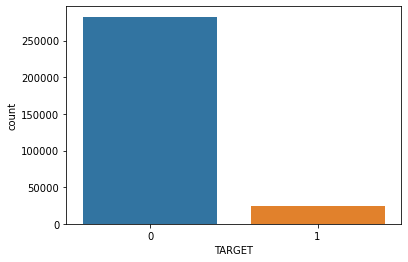

In [11]:
sns.countplot(x='TARGET',data=train_df);

<p> The target looks imbalanced. </p>

In [12]:
sum(train_df.duplicated())

0

<p> Looks like non of the rows are duplicate. </p>

<hr>

# Dealing with NaN Values

In [13]:
train_df.isna().sum() != 0

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [14]:
# no of columns
train_df.columns.shape

(122,)

In [15]:
# no of columns with nan values
train_df.columns[train_df.isna().sum() != 0].shape

(67,)

In [16]:
cols_with_nan = train_df.columns[train_df.isna().sum() != 0]

<p>67 Columns have NaN values.</p>

In [17]:
(train_df.isna().sum(axis=1) != 0).shape

(307511,)

In [18]:
train_df.shape

(307511, 122)

<p>Looks like all the rows have some NaN values</p>

<hr>

# Dealing with Null values, if any

In [19]:
train_df.isnull().sum() != 0

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [20]:
train_df.columns[train_df.isnull().sum() != 0].shape

(67,)

In [21]:
all(train_df.columns[train_df.isna().sum() != 0] == train_df.columns[train_df.isnull().sum() != 0])

True

Looks like NaN values and Null values represent same in case of our dataset and there are 67 of them.

<hr>

# Columns with Null/NaN values with count

In [22]:
cols_with_50_perc_nan = {}
for col,no_of_nans in train_df[train_df.columns[train_df.isna().sum() != 0]].isna().sum().sort_values(ascending=False).iteritems():
    if (no_of_nans/train_df.shape[0]*100) > 50:
        cols_with_50_perc_nan[col] = no_of_nans/train_df.shape[0]*100

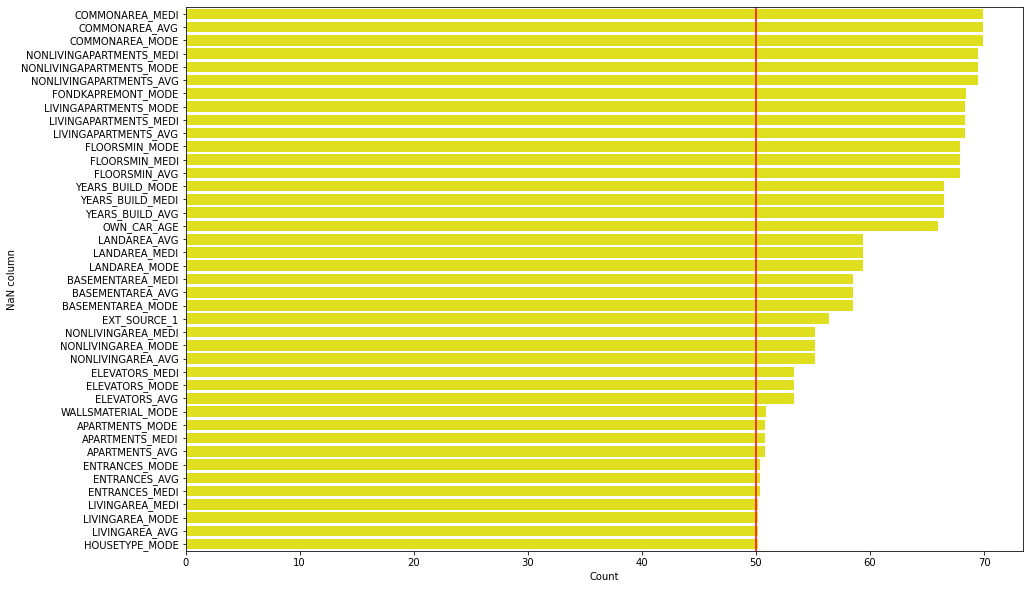

In [23]:
pd_cols_with_50_perc_nan = pd.DataFrame([(x,y) for x,y in cols_with_50_perc_nan.items()],index=range(len(cols_with_50_perc_nan.keys())),columns=["NaN column",'Count'])
plt.figure(figsize=(15,10))
plt.axvline(x=50,color='red')
sns.barplot(y='NaN column',x='Count',data=pd_cols_with_50_perc_nan,color='yellow')
plt.show()

In [24]:
len(cols_with_50_perc_nan)

41

<hr>

# Dealing with Float NaN Columns

In [25]:
col_with_50_float_nan = [col for col,value in (train_df[cols_with_50_perc_nan].dtypes == 'float64').iteritems() if value]

In [26]:
len(col_with_50_float_nan)

38

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Looks like in the columns with 50% NaN values, float type is mostly occuring. Out of 65 float columns, 38 have NaN more than 50%. Its better to drop.

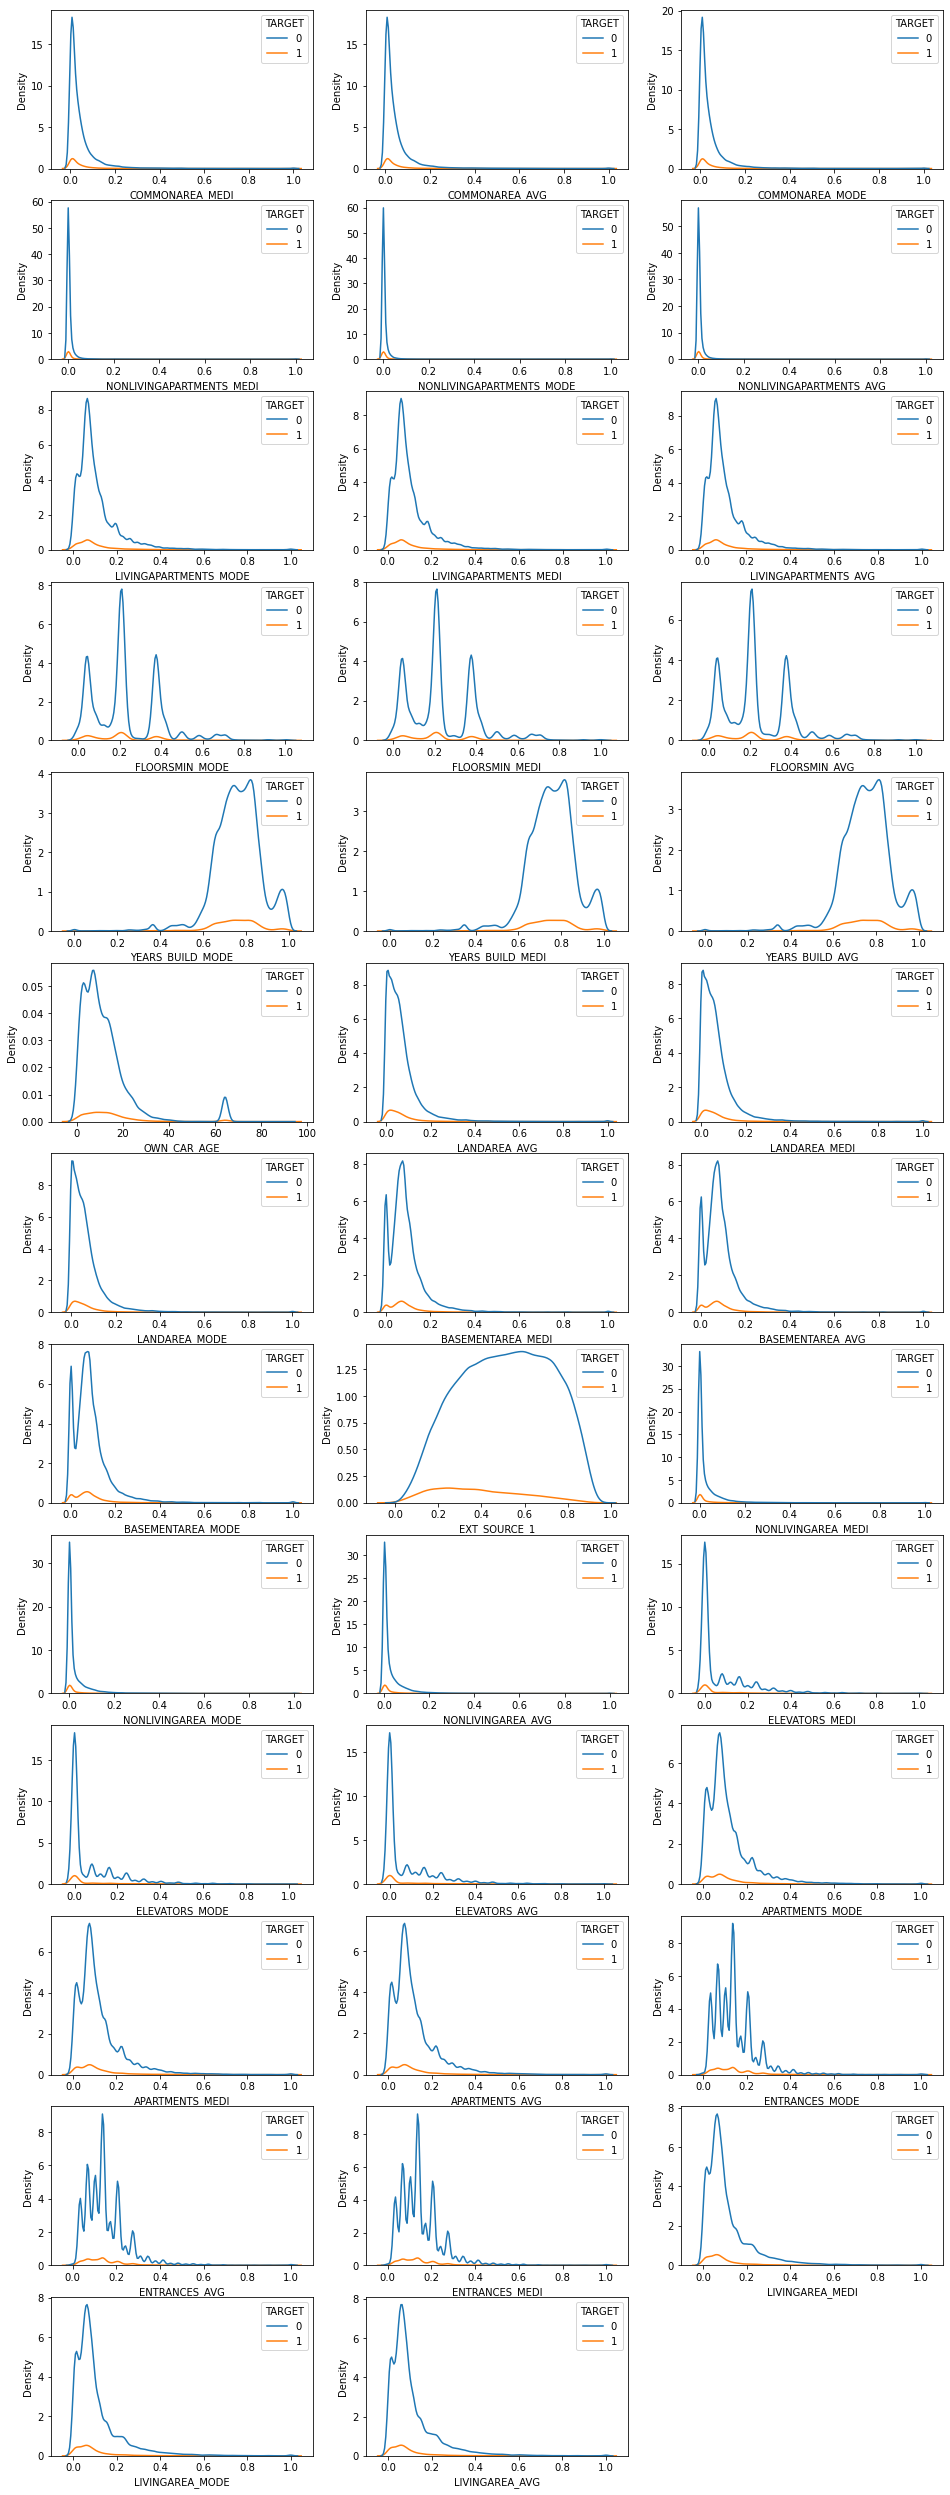

In [28]:
i = 1
plt.figure(figsize=(16,45))
for col in col_with_50_float_nan:
    plt.subplot(13,3,i,)
    sns.kdeplot(train_df[col],hue=train_df['TARGET'])
    i = i + 1

<p>
    The PDFs of these float type columns with NaN values donot follow a Normal Distribution. I was thinking of inserting mean if the columns had followed Normal Distribution. They have more than 50% NaN values. Its good to drop these columms.
</p>

<hr>

# Dropping Float Columns with more than 50% NaN values

In [29]:
train_df.drop(col_with_50_float_nan,axis=1,inplace=True)

In [30]:
train_df.shape

(307511, 84)

<hr>

In [31]:
# pd.plotting.scatter_matrix(train_df[train_df.columns[train_df.dtypes == 'float64']])

# Non Numerical Columns having NaN

In [32]:
train_df.dtypes[train_df.dtypes == 'object'].shape

(16,)

In [33]:
train_df[train_df.columns[train_df.dtypes == 'object']].isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [34]:
object_cols_name_with_nan = train_df.columns[train_df.dtypes == 'object'][train_df[train_df.columns[train_df.dtypes == 'object']].isna().sum() != 0]

In [35]:
object_cols_name_with_nan.shape

(6,)

<p>6 Non Numerical Columns have NaN values.</p>

In [36]:
for c in object_cols_name_with_nan:
    print(c,train_df[c].isna().sum()/train_df.shape[0]*100)

NAME_TYPE_SUITE 0.42014757195677555
OCCUPATION_TYPE 31.345545362604916
FONDKAPREMONT_MODE 68.38617155158677
HOUSETYPE_MODE 50.176091261776
WALLSMATERIAL_MODE 50.8407829313423
EMERGENCYSTATE_MODE 47.39830445089769


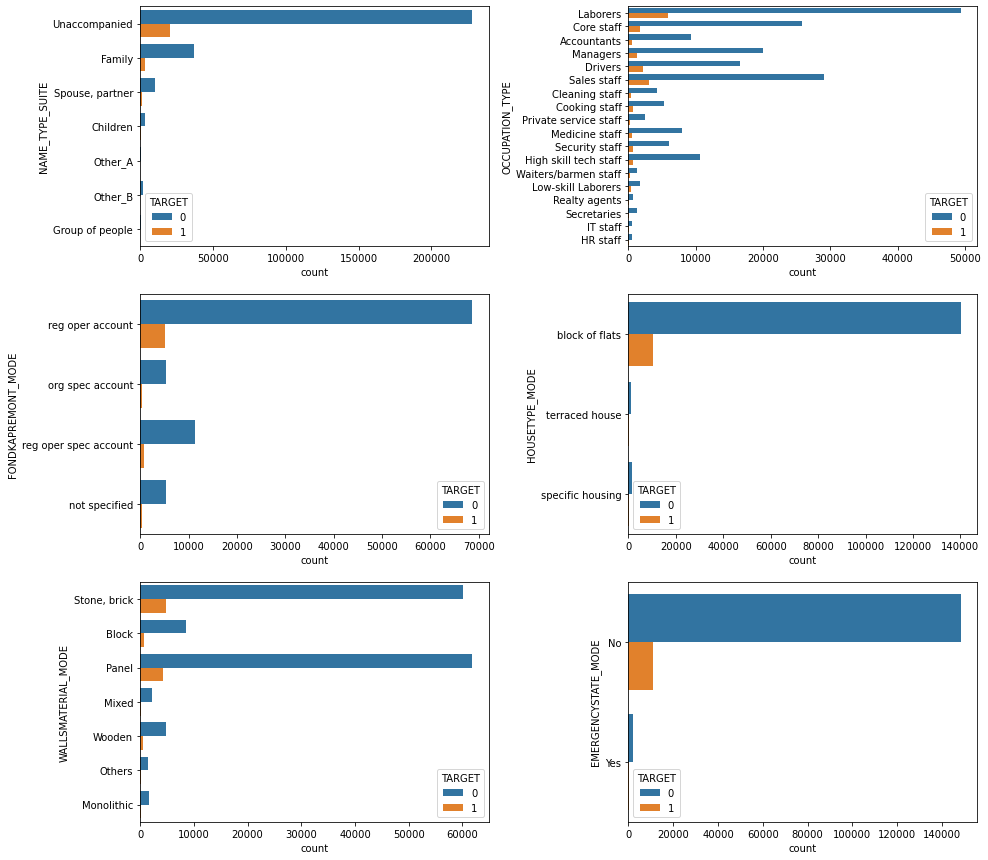

In [37]:
i = 1
plt.figure(figsize=(15,15))
for col in object_cols_name_with_nan:
    plt.subplot(3,2,i)
    plt.subplots_adjust(wspace = 0.4)
    sns.countplot(y=col,data=train_df,hue='TARGET')
    i = i + 1

In [38]:
non_numerical_cols_to_drop = ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']

<hr>

# Dropping Non Numerical Columns with more than 50% NaN values

In [39]:
train_df.drop(non_numerical_cols_to_drop,axis=1,inplace=True)

In [40]:
train_df.shape

(307511, 81)

<hr>

# Dealing int columns with NaN, if any

In [41]:
train_df[train_df.columns[train_df.dtypes == 'int64']].isna().sum()

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUM

<p>Looks like none of the int columns are NaN</p>

In [42]:
int_cols_name = train_df.columns[train_df.dtypes=='int64']
int_cols_name.shape

(41,)

In [43]:
for c in int_cols_name:
    print(c)
    print(pd.Categorical(train_df[c]))
    print("*"*60)
    print("\n")

SK_ID_CURR
[100002, 100003, 100004, 100006, 100007, ..., 456251, 456252, 456253, 456254, 456255]
Length: 307511
Categories (307511, int64): [100002, 100003, 100004, 100006, ..., 456252, 456253, 456254, 456255]
************************************************************


TARGET
[1, 0, 0, 0, 0, ..., 0, 0, 0, 1, 0]
Length: 307511
Categories (2, int64): [0, 1]
************************************************************


CNT_CHILDREN
[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 307511
Categories (15, int64): [0, 1, 2, 3, ..., 11, 12, 14, 19]
************************************************************


DAYS_BIRTH
[-9461, -16765, -19046, -19005, -19932, ..., -9327, -20775, -14966, -11961, -16856]
Length: 307511
Categories (17460, int64): [-25229, -25201, -25200, -25197, ..., -7678, -7676, -7673, -7489]
************************************************************


DAYS_EMPLOYED
[-637, -1188, -225, -3039, -3038, ..., -236, 365243, -7921, -4786, -1262]
Length: 307511
Categories (12574, int

In [44]:
cols_for_hist='SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH'

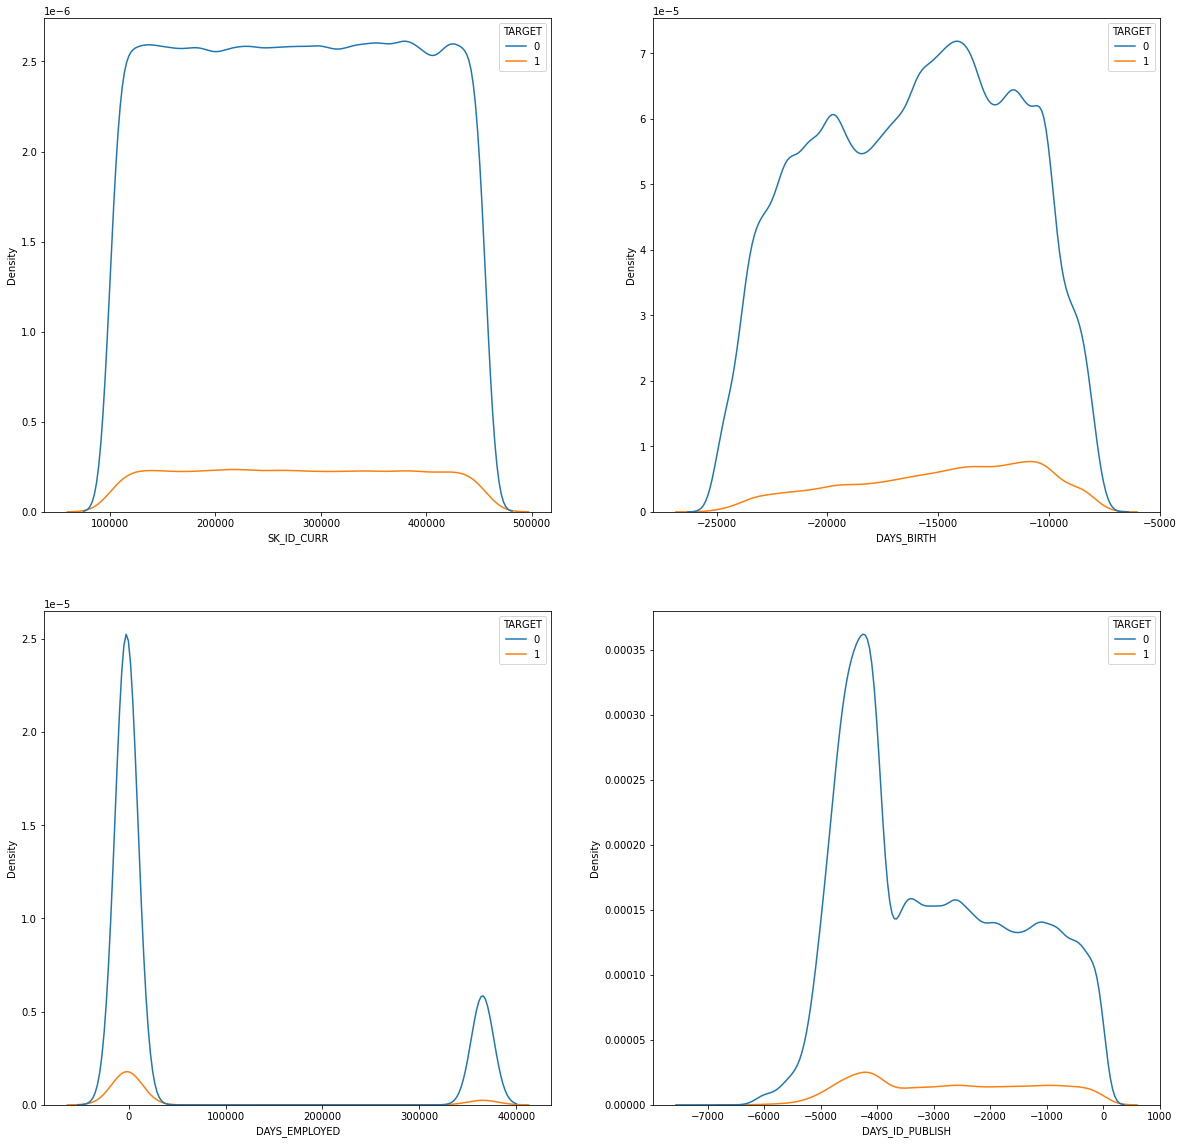

In [45]:
plt.figure(figsize=(20,20))
for i,j in enumerate(cols_for_hist):
    plt.subplot(2,2,i+1)
    sns.kdeplot(train_df[j],hue=train_df['TARGET'])
plt.show()

In [46]:
train_df.shape

(307511, 81)

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [48]:
float_cols_name = train_df.columns[train_df.dtypes=='float64']
float_cols_name.shape

(27,)

<AxesSubplot:>

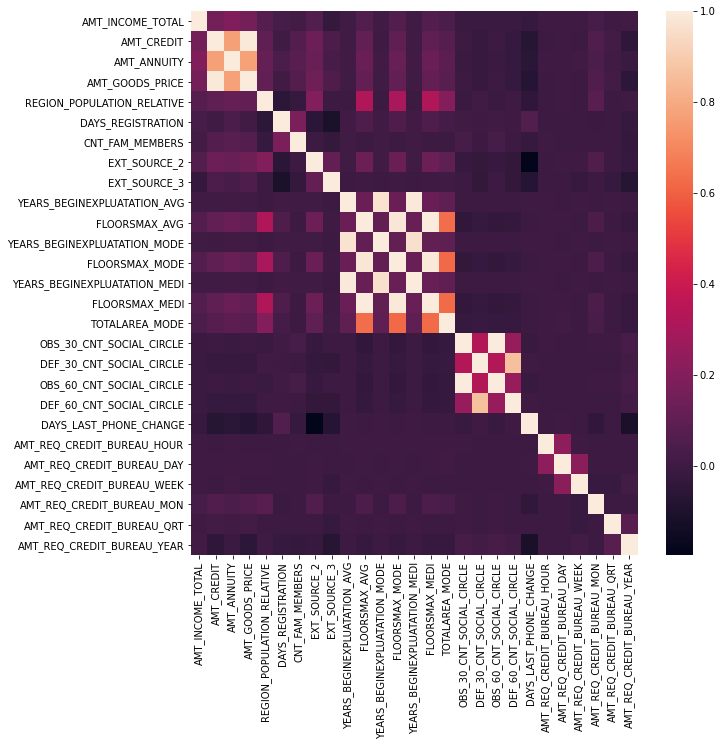

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df[float_cols_name].corr())

In [50]:
int_cols_name = train_df.columns[train_df.dtypes=='int64']
int_cols_name.shape

(41,)

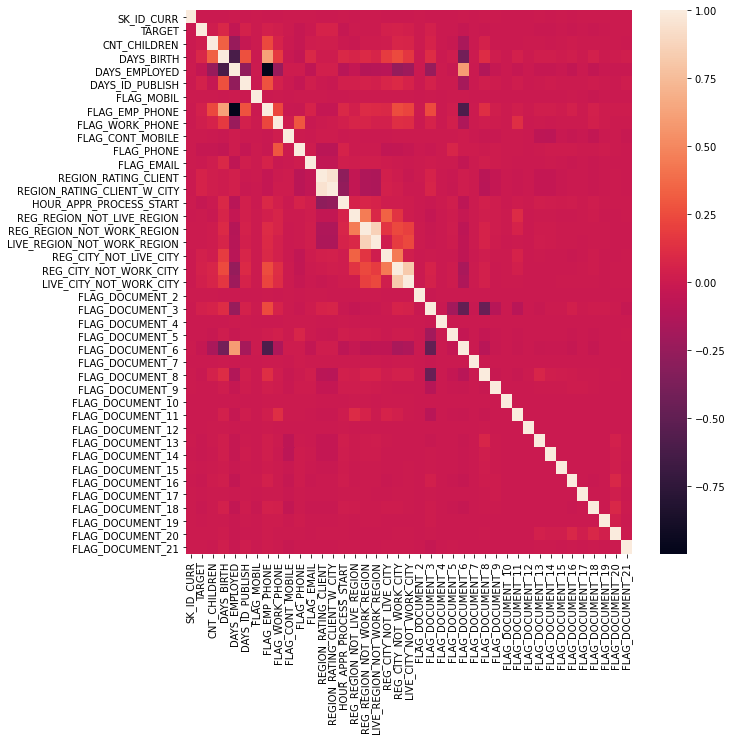

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df[int_cols_name].corr());

In [52]:
object_cols_name = train_df.columns[train_df.dtypes=='object']
object_cols_name.shape

(13,)

<hr>

# Filling Missing Values

In [53]:
train_df[object_cols_name.values].isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
EMERGENCYSTATE_MODE           145755
dtype: int64

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


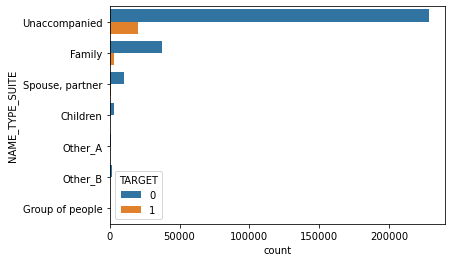

In [54]:
print(train_df['NAME_TYPE_SUITE'].value_counts())
sns.countplot(y='NAME_TYPE_SUITE',data=train_df,hue='TARGET');

In [55]:
train_df['NAME_TYPE_SUITE'] = train_df['NAME_TYPE_SUITE'].fillna('Unaccompanied')

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


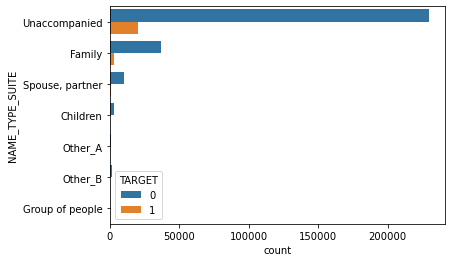

In [56]:
print(train_df['NAME_TYPE_SUITE'].value_counts())
sns.countplot(y='NAME_TYPE_SUITE',data=train_df,hue='TARGET');

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


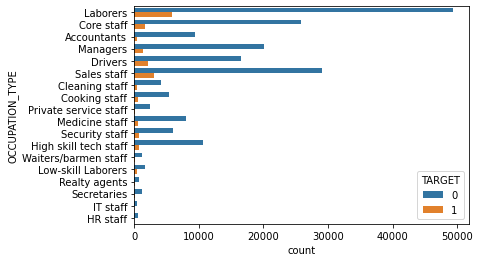

In [57]:
print(train_df['OCCUPATION_TYPE'].value_counts())
sns.countplot(y='OCCUPATION_TYPE',data=train_df,hue='TARGET');

In [58]:
total = train_df['OCCUPATION_TYPE'].value_counts().sum()
print(total)
population = []
weights = []
for i,j in train_df['OCCUPATION_TYPE'].value_counts().iteritems():
    population.append(i)
    weights.append(j/total)
print(population)
print(weights)

211120
['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff', 'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff']
[0.2613963622584312, 0.15205570291777187, 0.13058923834785904, 0.10122679045092839, 0.08811576354679802, 0.053902993558165975, 0.046480674497915875, 0.04043671845395983, 0.031834975369458125, 0.028164077302008338, 0.02203959833270178, 0.012561576354679803, 0.009913793103448277, 0.006384994316028798, 0.006181318681318681, 0.00355721864342554, 0.0026667298219022356, 0.002491474043198181]


In [59]:
import random
occupation_filling_values = random.choices(population=population,weights=weights,k=96391)

In [60]:
def get_random_occupation():
    return np.random.choice(occupation_filling_values)

In [61]:
train_df['OCCUPATION_TYPE'] = train_df['OCCUPATION_TYPE'].fillna(get_random_occupation())

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64


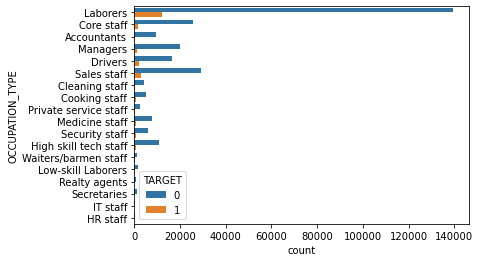

In [62]:
print(train_df['OCCUPATION_TYPE'].value_counts())
sns.countplot(y='OCCUPATION_TYPE',data=train_df,hue='TARGET');

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64


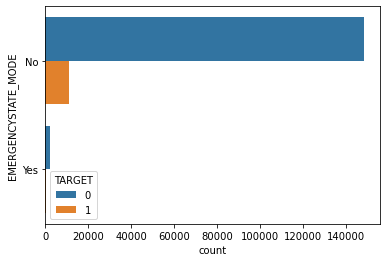

In [63]:
print(train_df['EMERGENCYSTATE_MODE'].value_counts())
sns.countplot(y='EMERGENCYSTATE_MODE',data=train_df,hue='TARGET');

In [64]:
total = train_df['EMERGENCYSTATE_MODE'].value_counts().sum()
print(total)
population = []
weights = []
for i,j in train_df['EMERGENCYSTATE_MODE'].value_counts().iteritems():
    population.append(i)
    weights.append(j/total)
print(population)
print(weights)

161756
['No', 'Yes']
[0.98560795271891, 0.014392047281090036]


In [65]:
emergency_filling_values = random.choices(population=population,weights=weights,k=145755)

In [66]:
def get_random_emergency():
    return np.random.choice(emergency_filling_values)

In [67]:
train_df['EMERGENCYSTATE_MODE'] = train_df['EMERGENCYSTATE_MODE'].fillna(get_random_emergency())

No     305183
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64


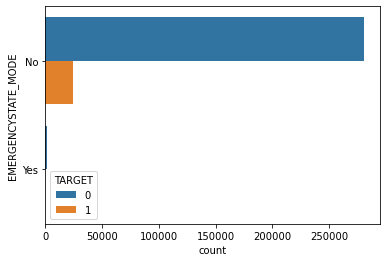

In [68]:
print(train_df['EMERGENCYSTATE_MODE'].value_counts())
sns.countplot(y='EMERGENCYSTATE_MODE',data=train_df,hue='TARGET');

In [69]:
train_df[object_cols_name.values].isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
EMERGENCYSTATE_MODE           0
dtype: int64

<p>We have filled the non numerical nan valued column with some data</p>

<hr>

In [70]:
train_df[float_cols_name.values].isna().sum()

AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
REGION_POPULATION_RELATIVE           0
DAYS_REGISTRATION                    0
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT

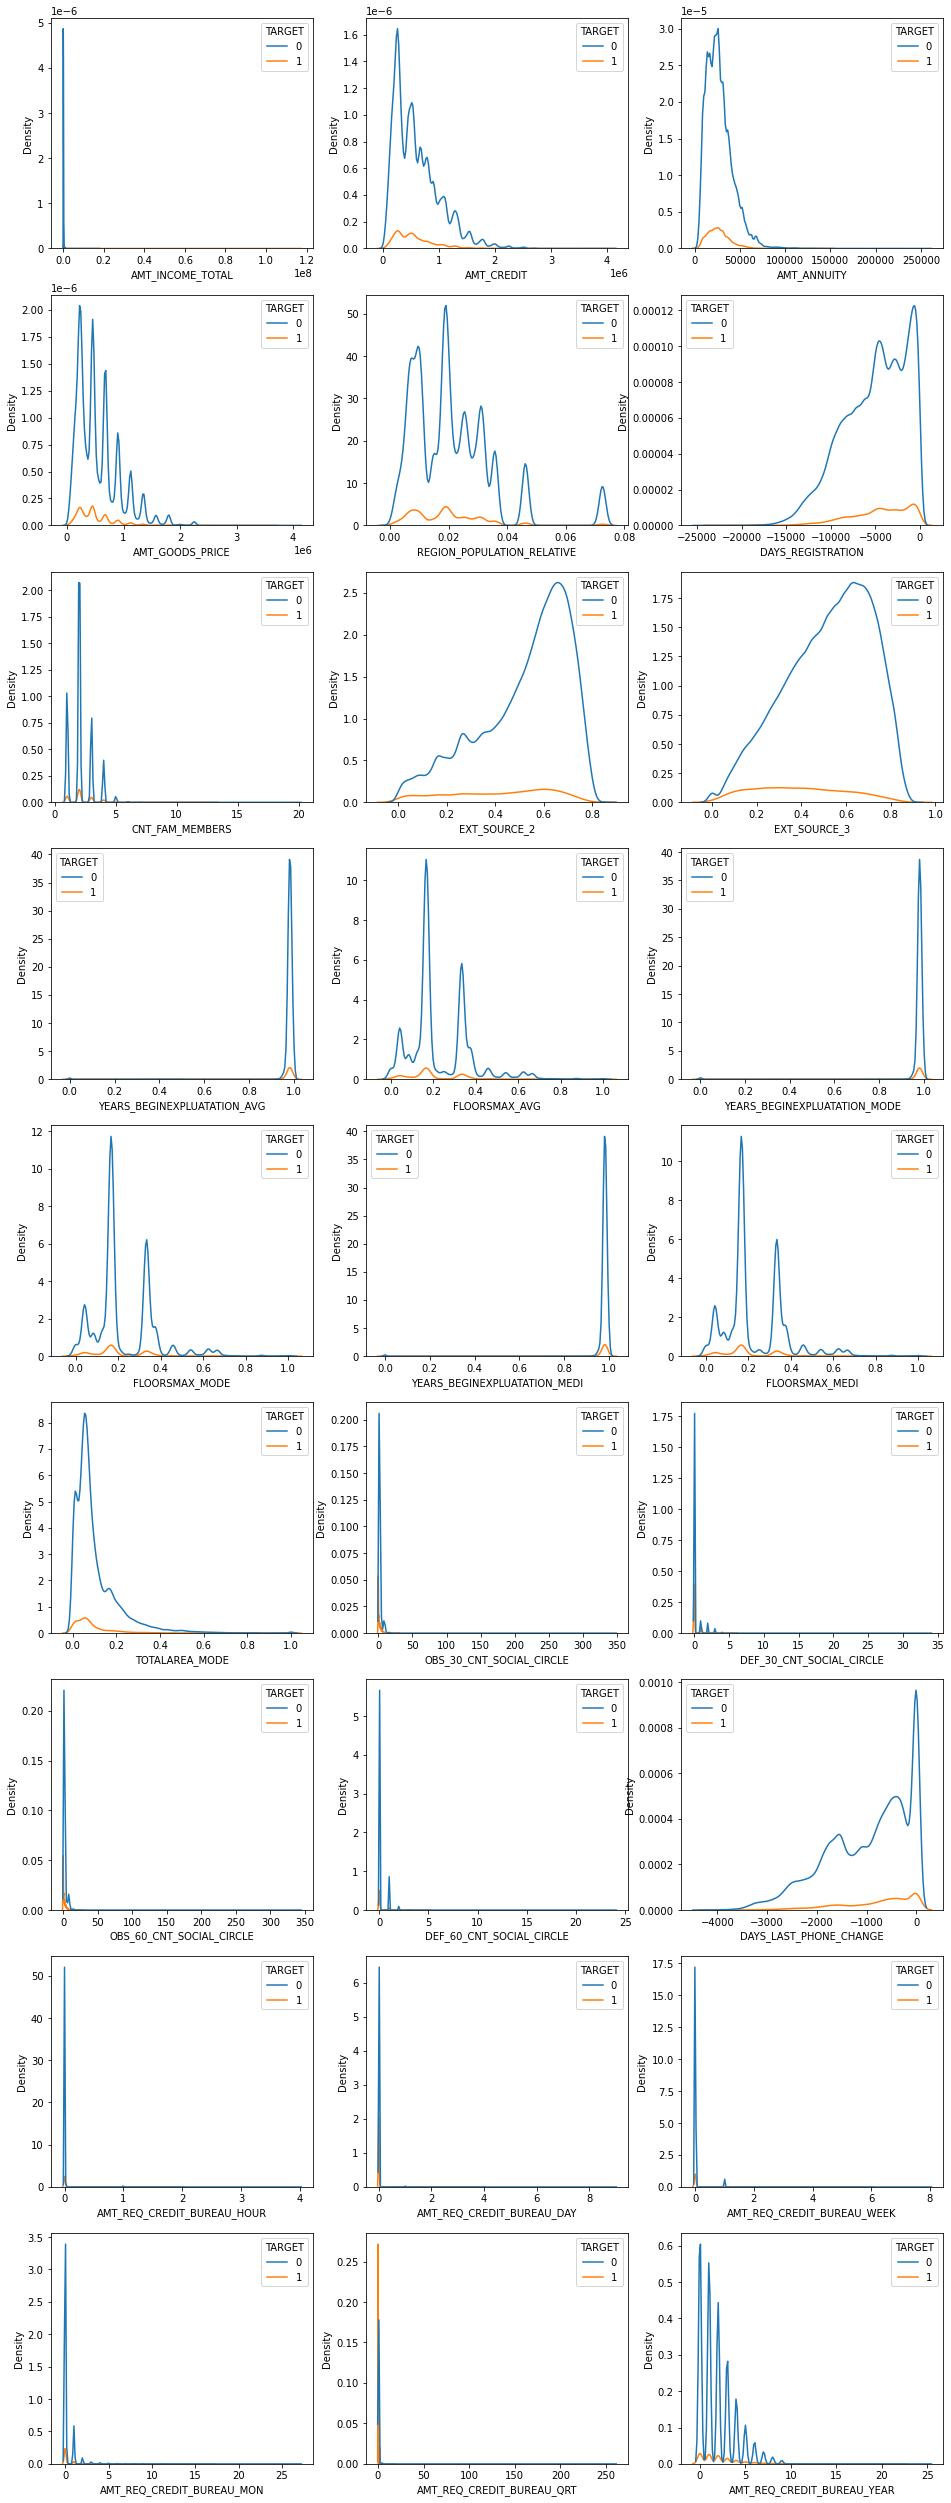

In [71]:
i = 1
plt.figure(figsize=(16,45))
for col in float_cols_name:
    plt.subplot(9,3,i,)
    sns.kdeplot(train_df[col],hue=train_df['TARGET'])
    i = i + 1

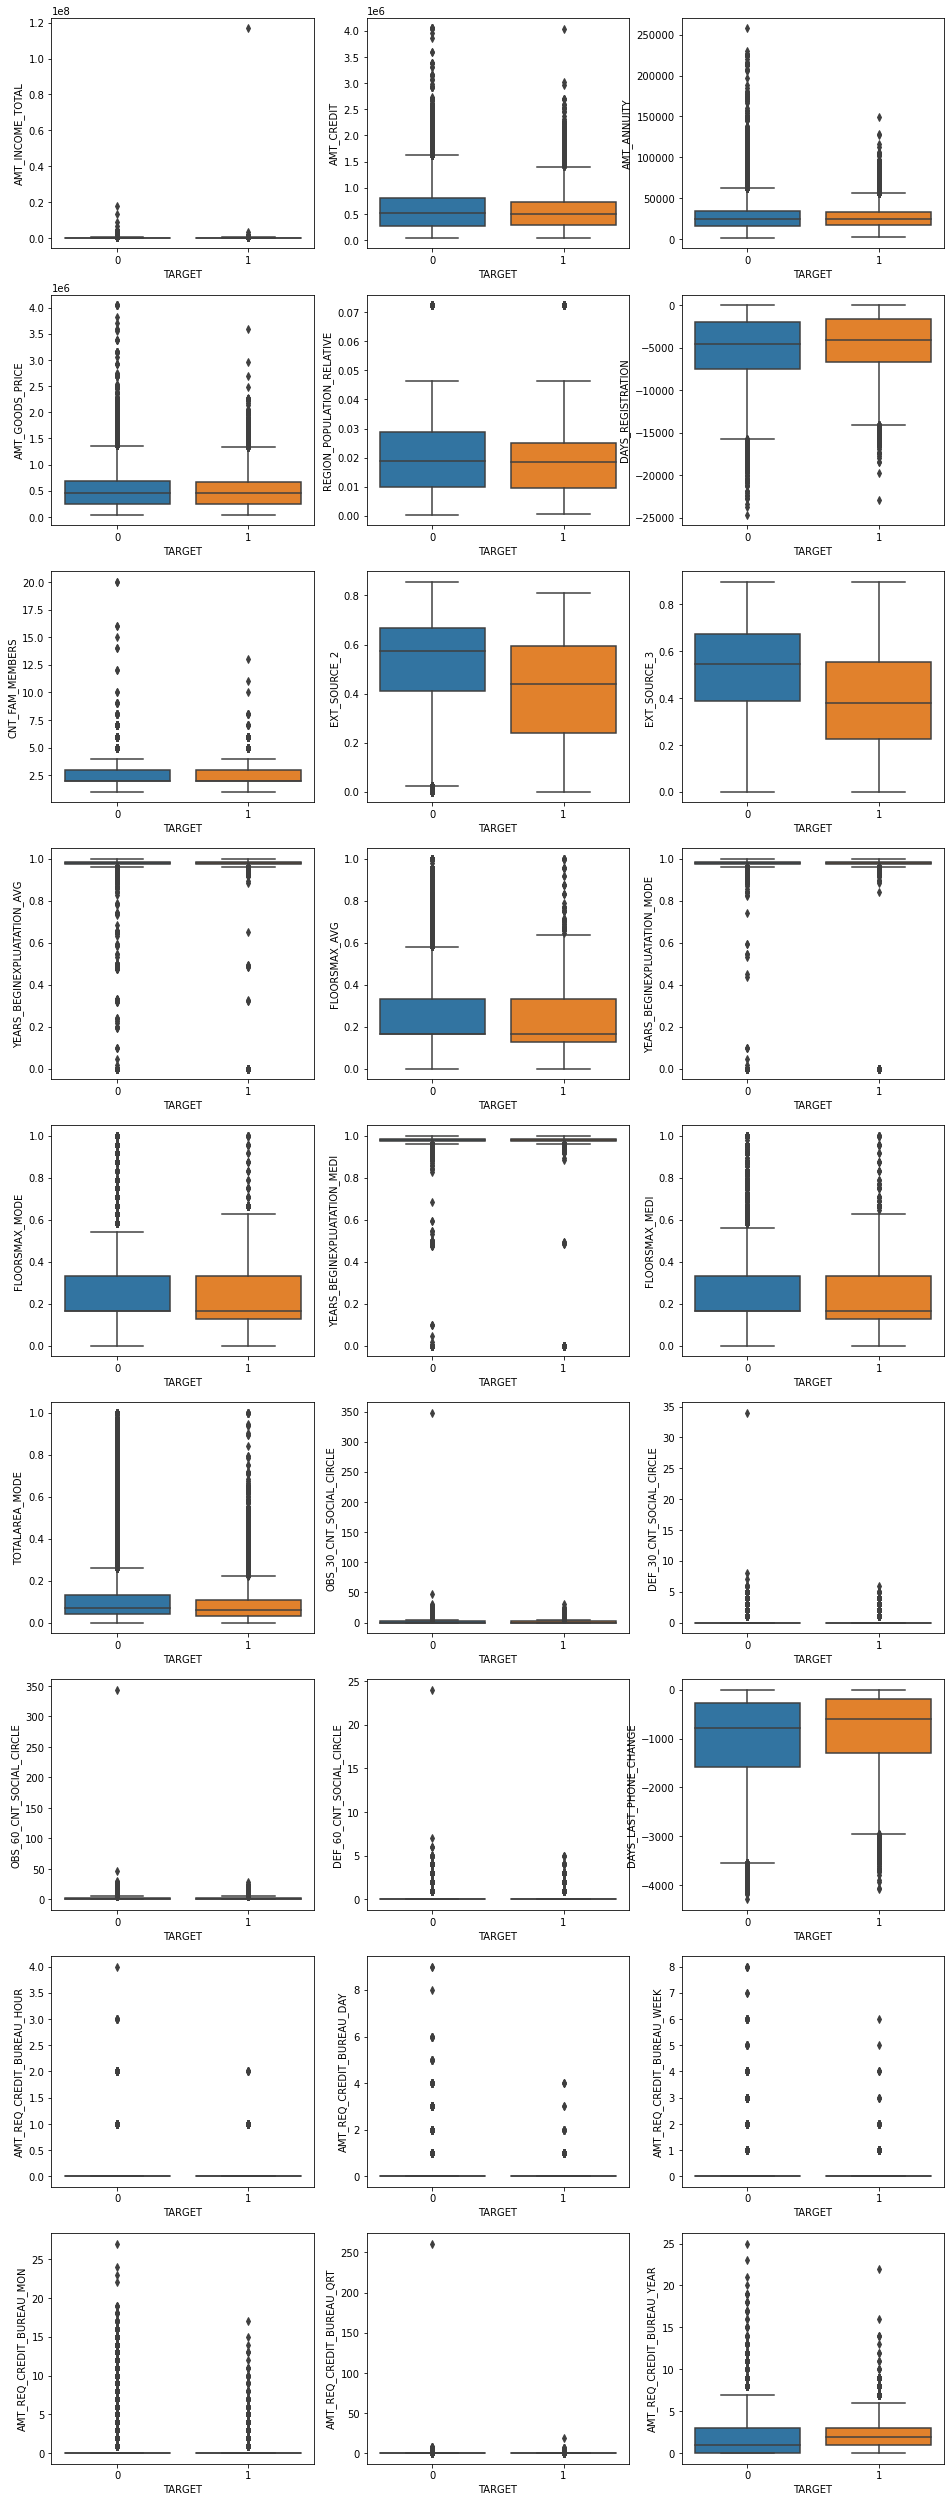

In [72]:
i = 1
plt.figure(figsize=(16,45))
for col in float_cols_name.values:
    plt.subplot(9,3,i,)
    sns.boxplot(y=col,x='TARGET',data=train_df)
    i = i + 1

In [73]:
float_nan_cols = object_cols_name_with_nan = train_df.columns[train_df.dtypes == 'float64'][train_df[train_df.columns[train_df.dtypes == 'float64']].isna().sum() != 0]
float_nan_cols

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [74]:
float_nan_cols.shape

(23,)

In [75]:
no_outlier_column = ['EXT_SOURCE_3']

60965 is the number of NaN values.


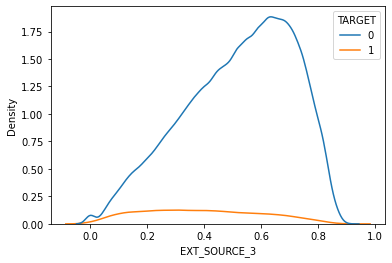

In [76]:
print(train_df[no_outlier_column[0]].isna().sum(), "is the number of NaN values.")
sns.kdeplot(train_df[no_outlier_column[0]],hue=train_df['TARGET']);

In [77]:
mean_ext_source_3 = train_df[no_outlier_column[0]].mean()
std_ext_source_3 = train_df[no_outlier_column[0]].std()

In [78]:
mean_ext_source_3,std_ext_source_3

(0.5108529061800121, 0.19484436446376072)

<AxesSubplot:ylabel='Density'>

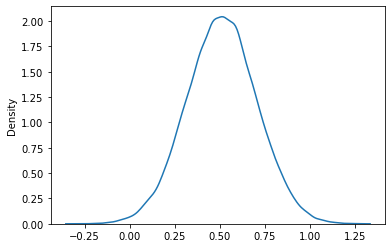

In [79]:
ext_source_3_filling_values=np.random.normal(mean_ext_source_3,std_ext_source_3,size=60965)
sns.kdeplot(ext_source_3_filling_values)

In [80]:
def ext_source_3_get_random():
    return float(np.random.choice(ext_source_3_filling_values))

In [81]:
train_df[no_outlier_column[0]]= train_df[no_outlier_column[0]].fillna(ext_source_3_get_random())

0 is the number of NaN values.


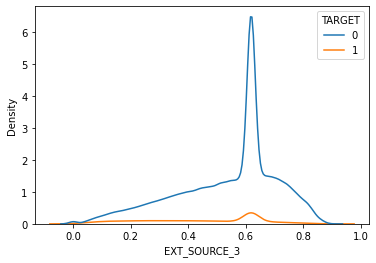

In [82]:
print(train_df[no_outlier_column[0]].isna().sum(), "is the number of NaN values.")
sns.kdeplot(train_df[no_outlier_column[0]],hue=train_df['TARGET']);

In [83]:
float_cols_with_outliers = [col for col in float_nan_cols if col not in no_outlier_column]

In [84]:
len(float_cols_with_outliers)

22

In [85]:
for col in float_cols_with_outliers:
    median = train_df[col].median()
    train_df[col] = train_df[col].fillna(median)
    

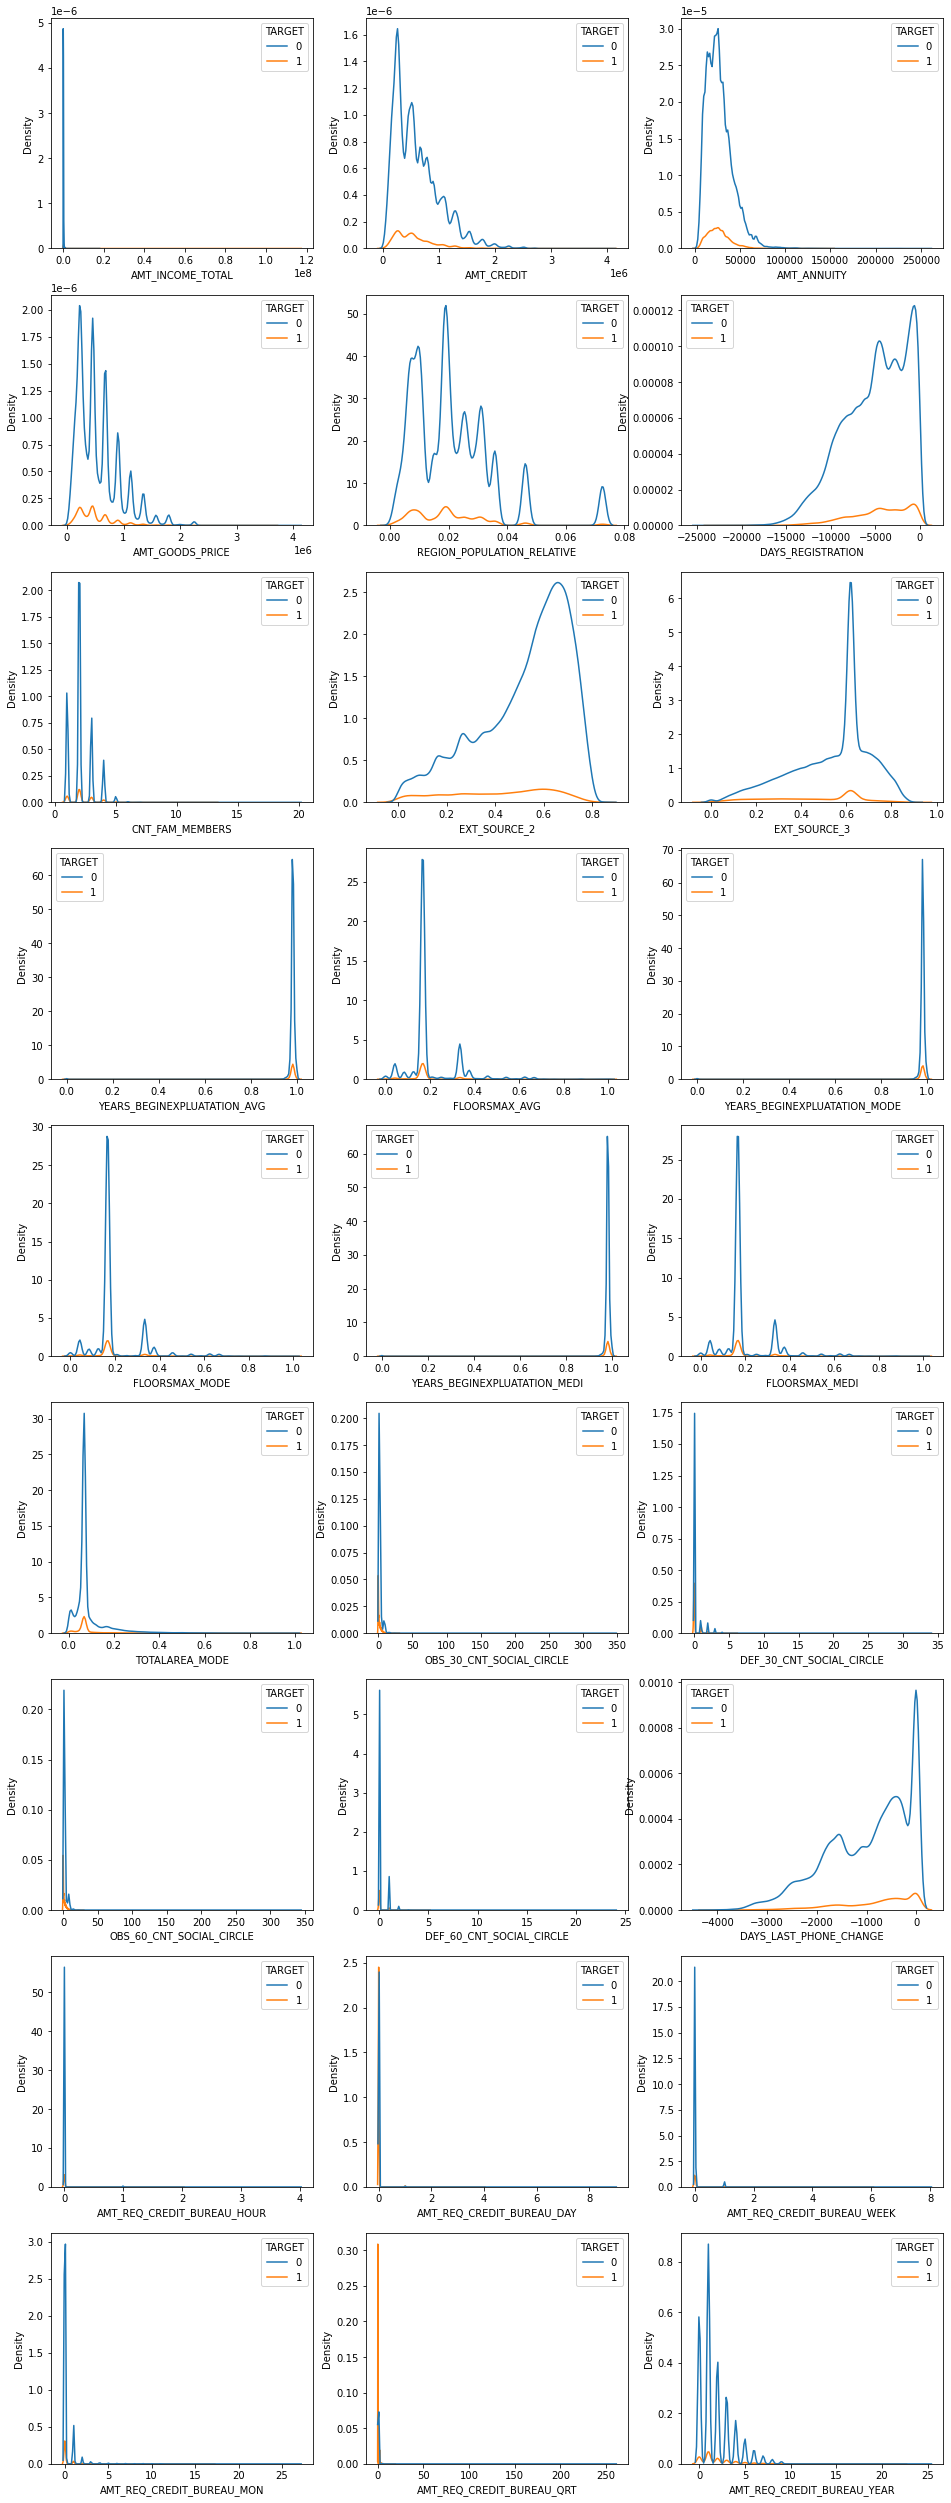

In [86]:
i = 1
plt.figure(figsize=(16,45))
for col in float_cols_name:
    plt.subplot(9,3,i,)
    sns.kdeplot(train_df[col],hue=train_df['TARGET'])
    i = i + 1

In [87]:
train_df[float_cols_name.values].isna().sum()

AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_REGISTRATION               0
CNT_FAM_MEMBERS                 0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
YEARS_BEGINEXPLUATATION_AVG     0
FLOORSMAX_AVG                   0
YEARS_BEGINEXPLUATATION_MODE    0
FLOORSMAX_MODE                  0
YEARS_BEGINEXPLUATATION_MEDI    0
FLOORSMAX_MEDI                  0
TOTALAREA_MODE                  0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_60_CNT_SOCIAL_CIRCLE        0
DAYS_LAST_PHONE_CHANGE          0
AMT_REQ_CREDIT_BUREAU_HOUR      0
AMT_REQ_CREDIT_BUREAU_DAY       0
AMT_REQ_CREDIT_BUREAU_WEEK      0
AMT_REQ_CREDIT_BUREAU_MON       0
AMT_REQ_CREDIT_BUREAU_QRT       0
AMT_REQ_CREDIT_BUREAU_YEAR      0
dtype: int64

<hr>

<AxesSubplot:>

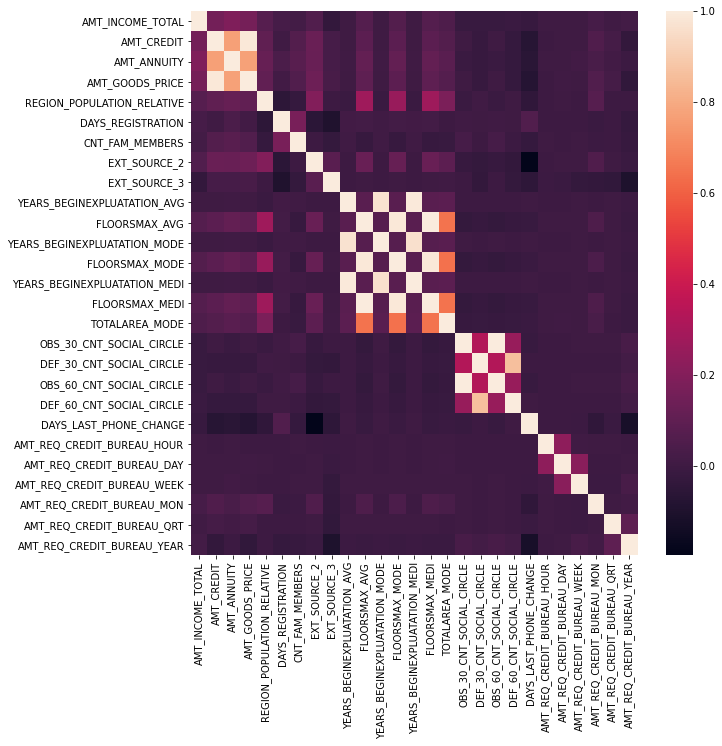

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df[float_cols_name].corr())

<hr>

# Scaling Float Columns

In [89]:
float_cols_name.shape

(27,)

In [90]:
from sklearn.preprocessing import RobustScaler

In [91]:
scaler = RobustScaler()
scaler.fit(train_df[float_cols_name])
train_df[float_cols_name] = scaler.transform(train_df[float_cols_name])

In [92]:
train_df[float_cols_name]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.615,-0.198521,-0.011205,-0.224490,-0.002626,0.156504,-1.0,-1.120410,-2.119410,-18.8,...,2.0,1.0,2.0,-0.290895,0.0,0.0,0.0,0.0,0.0,0.0
1,1.365,1.448012,0.597361,1.540816,-0.820550,0.606637,0.0,0.208115,0.069041,7.0,...,0.0,0.5,0.0,-0.054784,0.0,0.0,0.0,0.0,0.0,-0.5
2,-0.885,-0.702740,-1.004482,-0.714286,-0.472638,0.044611,-1.0,-0.037158,0.572127,0.0,...,0.0,0.0,0.0,-0.044753,0.0,0.0,0.0,0.0,0.0,-0.5
3,-0.135,-0.372874,0.264691,-0.346939,-0.580533,-0.974312,0.0,0.312371,0.069041,0.0,...,0.0,1.0,0.0,0.108025,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.285,-0.000986,-0.168078,0.142857,0.525969,0.035287,-1.0,-0.899334,0.069041,0.0,...,0.0,0.0,0.0,-0.269290,0.0,0.0,0.0,0.0,0.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.115,-0.480518,0.146912,-0.510204,0.734898,-0.722552,-1.0,0.427701,0.069041,12.0,...,0.0,0.0,0.0,0.373457,0.0,0.0,0.0,0.0,0.0,0.0
307507,-0.835,-0.452949,-0.713894,-0.510204,0.338425,0.021209,-1.0,-1.663792,0.069041,-17.8,...,0.0,0.0,0.0,0.584105,0.0,0.0,0.0,0.0,0.0,0.0
307508,0.065,0.304712,0.280876,0.306122,-0.742242,-0.408264,-1.0,-0.111813,-1.756930,0.0,...,0.0,3.0,0.0,-0.888889,1.0,0.0,0.0,1.0,0.0,0.0
307509,0.265,-0.266266,-0.259960,-0.295918,-0.725572,0.355060,0.0,-0.191529,0.259540,-9.0,...,0.0,0.0,0.0,0.335648,0.0,0.0,0.0,0.0,0.0,-0.5


<hr>

# Categorical -> Numerical

In [93]:
for i in train_df.dtypes[train_df.dtypes == 'object'].keys():
    print(i)
    print(pd.Categorical(train_df[i]))
    print("*"*60)
    print("\n")

NAME_CONTRACT_TYPE
['Cash loans', 'Cash loans', 'Revolving loans', 'Cash loans', 'Cash loans', ..., 'Cash loans', 'Cash loans', 'Cash loans', 'Cash loans', 'Cash loans']
Length: 307511
Categories (2, object): ['Cash loans', 'Revolving loans']
************************************************************


CODE_GENDER
['M', 'F', 'M', 'F', 'M', ..., 'M', 'F', 'F', 'F', 'F']
Length: 307511
Categories (3, object): ['F', 'M', 'XNA']
************************************************************


FLAG_OWN_CAR
['N', 'N', 'Y', 'N', 'N', ..., 'N', 'N', 'N', 'N', 'N']
Length: 307511
Categories (2, object): ['N', 'Y']
************************************************************


FLAG_OWN_REALTY
['Y', 'N', 'Y', 'Y', 'Y', ..., 'N', 'Y', 'Y', 'Y', 'N']
Length: 307511
Categories (2, object): ['N', 'Y']
************************************************************


NAME_TYPE_SUITE
['Unaccompanied', 'Family', 'Unaccompanied', 'Unaccompanied', 'Unaccompanied', ..., 'Unaccompanied', 'Unaccompanied', 'Unac

In [94]:
# one_hot_encoder = OneHotEncoder(sparse=False)
# one_hot_encoder.fit_transform(train_df[''].values.reshape(-1,1))

In [95]:
train_df = train_df.join(pd.get_dummies(train_df['NAME_CONTRACT_TYPE'],prefix='NAME_CONTRACT_TYPE'))
train_df.drop('NAME_CONTRACT_TYPE',axis=1,inplace=True)

In [96]:
train_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [97]:
CODE_GENDER_mapping = {
    "M": 1,
    "F": 0,
    "XNA": 0
}

train_df['CODE_GENDER'] = train_df['CODE_GENDER'].map(CODE_GENDER_mapping)

In [98]:
FLAG_OWN_CAR_mapping = {
    'N':0,
    'Y':1
}

train_df['FLAG_OWN_CAR'] = train_df['FLAG_OWN_CAR'].map(FLAG_OWN_CAR_mapping)

In [99]:
FLAG_OWN_REALTY_mapping = {
    'N':0,
    'Y':1
}
train_df['FLAG_OWN_REALTY'] = train_df['FLAG_OWN_REALTY'].map(FLAG_OWN_REALTY_mapping)

In [100]:
NAME_EDUCATION_TYPE_mapping = {
    'Academic degree':4,
    'Higher education':3, 
    'Incomplete higher':2, 
    'Lower secondary':0, 
    'Secondary / secondary special':1
}
train_df['NAME_EDUCATION_TYPE'] = train_df['NAME_EDUCATION_TYPE'].map(NAME_EDUCATION_TYPE_mapping)

In [101]:
EMERGENCYSTATE_MODE_mapping = {
    'No': 0,
    'Yes':1
}
train_df['EMERGENCYSTATE_MODE'] = train_df['EMERGENCYSTATE_MODE'].map(EMERGENCYSTATE_MODE_mapping)

In [102]:
cols_for_encoding = ['NAME_TYPE_SUITE',
                           'NAME_INCOME_TYPE',
                           'NAME_FAMILY_STATUS',
                           'NAME_HOUSING_TYPE',
                           'OCCUPATION_TYPE',
                           'WEEKDAY_APPR_PROCESS_START',
                           'ORGANIZATION_TYPE'
                          ]
for col in cols_for_encoding:
    mapped_value = train_df.groupby([col])['TARGET'].mean().to_dict()
    train_df[col] = train_df[col].map(mapped_value)

In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          307511 non-null  int64  
 1   TARGET                              307511 non-null  int64  
 2   CODE_GENDER                         307511 non-null  int64  
 3   FLAG_OWN_CAR                        307511 non-null  int64  
 4   FLAG_OWN_REALTY                     307511 non-null  int64  
 5   CNT_CHILDREN                        307511 non-null  int64  
 6   AMT_INCOME_TOTAL                    307511 non-null  float64
 7   AMT_CREDIT                          307511 non-null  float64
 8   AMT_ANNUITY                         307511 non-null  float64
 9   AMT_GOODS_PRICE                     307511 non-null  float64
 10  NAME_TYPE_SUITE                     307511 non-null  float64
 11  NAME_INCOME_TYPE          

In [104]:
train_df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans
0,100002,1,1,0,1,0,0.615,-0.198521,-0.011205,-0.224490,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,100003,0,0,0,0,0,1.365,1.448012,0.597361,1.540816,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.5,1,0
2,100004,0,1,1,1,0,-0.885,-0.702740,-1.004482,-0.714286,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.5,0,1
3,100006,0,0,0,1,0,-0.135,-0.372874,0.264691,-0.346939,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,100007,0,1,0,1,0,-0.285,-0.000986,-0.168078,0.142857,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.5,1,0


<hr>

In [105]:
int_cols_name.shape

(41,)

In [106]:
int_cols = train_df.columns[train_df.dtypes=='int64']
int_cols.shape

(46,)

In [107]:
int_cols

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_

In [108]:
categories = []
for i in train_df[int_cols].keys():
    if len(pd.Categorical(train_df[i]).categories) < 25:
        categories.append(i)

In [109]:
len(categories)

42

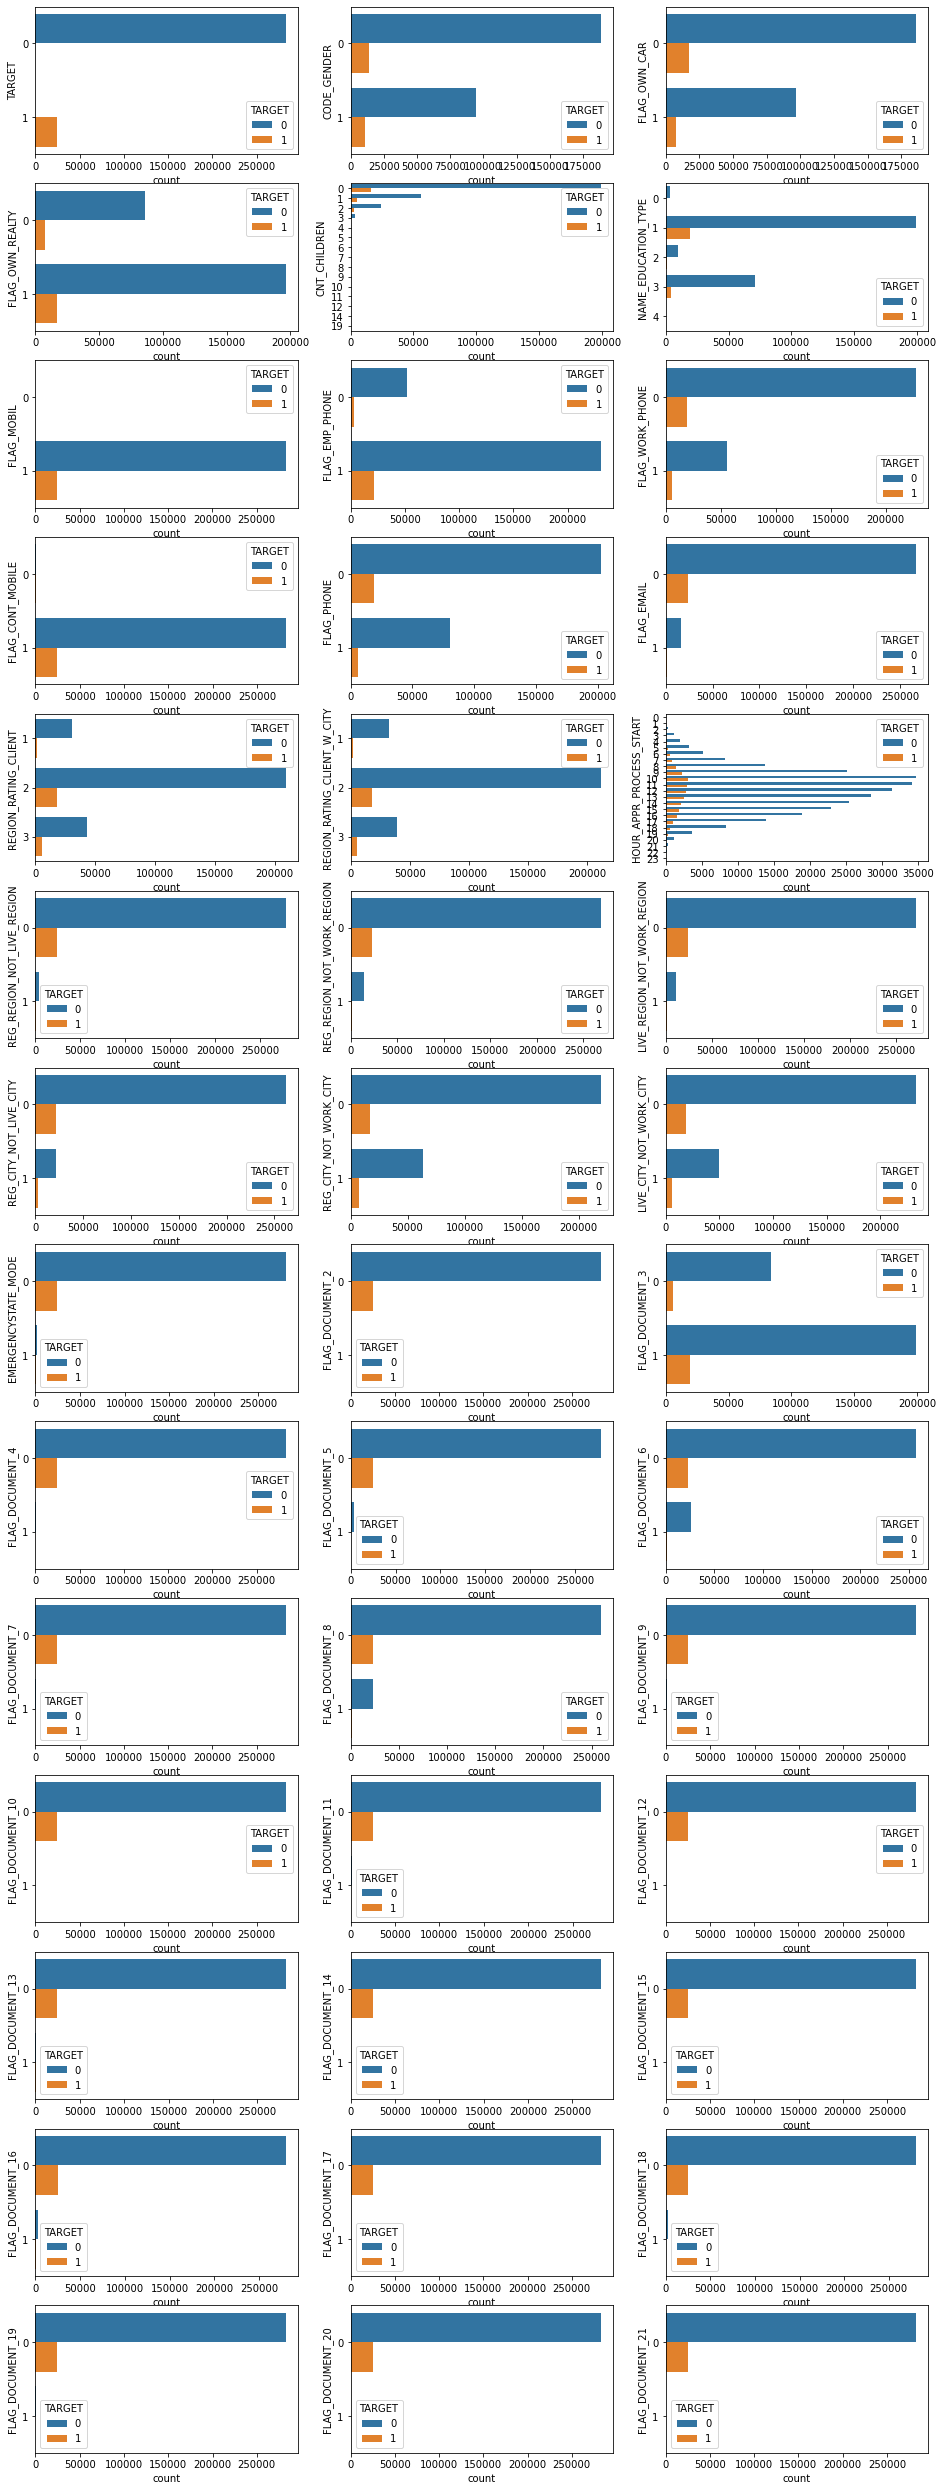

In [110]:
i = 1
plt.figure(figsize=(16,45))
for col in categories:
    plt.subplot(14,3,i,)
    sns.countplot(y=col,data=train_df,hue='TARGET')
    i = i + 1

<AxesSubplot:>

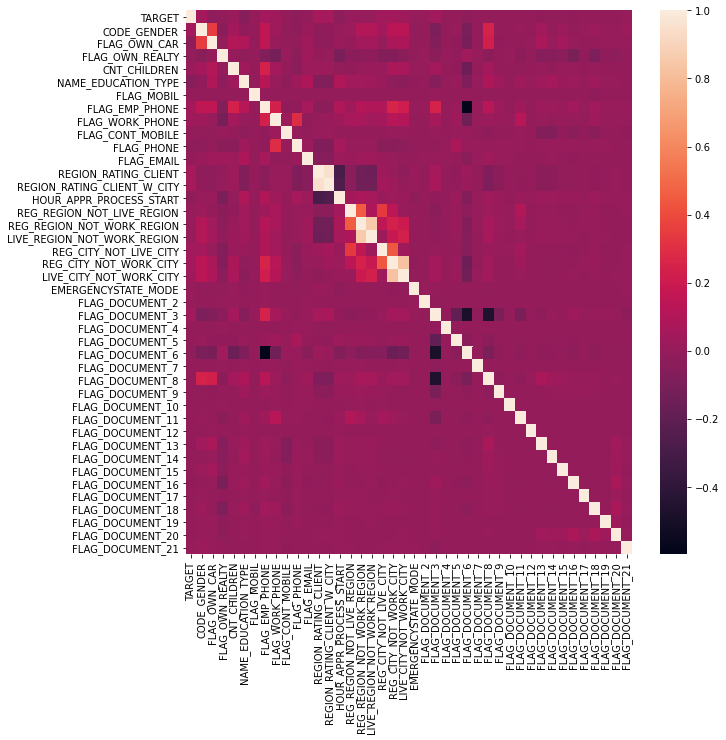

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df[categories].corr())

<hr>

# Model

In [112]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

In [113]:
X = train_df.drop('TARGET' , axis =1)
y = train_df['TARGET']
under = RandomUnderSampler(sampling_strategy='majority')
X , y = under.fit_resample(X, y)

In [114]:
X.shape

(49650, 81)

In [115]:
y.shape

(49650,)

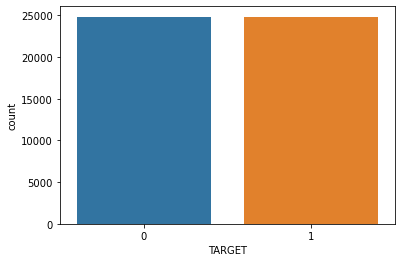

In [116]:
sns.countplot(x='TARGET',data=y.to_frame(name='TARGET'));

In [117]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

In [120]:
accuracy_score(y_test, y_pred)

0.5327291037260826

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54      4969
           1       0.53      0.51      0.52      4961

    accuracy                           0.53      9930
   macro avg       0.53      0.53      0.53      9930
weighted avg       0.53      0.53      0.53      9930



In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rnd_forest = RandomForestClassifier(n_estimators=30)

In [124]:
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [125]:
y_pred_rf = rnd_forest.predict(X_test)

In [126]:
accuracy_score(y_test, y_pred_rf)

0.6574018126888218

In [127]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      4969
           1       0.67      0.62      0.64      4961

    accuracy                           0.66      9930
   macro avg       0.66      0.66      0.66      9930
weighted avg       0.66      0.66      0.66      9930

